线性回归的公式： $\boldsymbol{y} = w.\boldsymbol{x}+b$

MSE 损失函数：

\begin{gather}
\mathcal{L}(y,\hat{y}) = \dfrac{1}{M} \sum_{i=1}^{M} (\hat{y}_i-y_i)^2
\label{eq:sq_loss}
\end{gather}

把线性回归公式带入 MSE 损失函数：

\begin{gather}
\mathcal{L}(y,x,w) = \dfrac{1}{M} \sum_{i=1}^{M} \big(\hat{y}_i- (w^Tx_i+b)\big)^2
\label{eq:model_loss}
\end{gather}

损失函数分别对 $w$ 和 $b$ 求偏导，偏导代表了 $w$ 和 $b$ 梯度增大最陡的方向：

\begin{gather}
\label{eq:dl_dw}
\dfrac{\partial\mathcal{L}(y,x,w)}{\partial w} = -\dfrac{1}{M} \sum_{i=1}^{M} 2x_i\big(\hat{y}_i - (w^Tx_i+b)\big)\\
\label{eq:dl_db}
\dfrac{\partial\mathcal{L}(y,x,w)}{\partial b} = -\dfrac{1}{M} \sum_{i=1}^{M} 2\big(\hat{y}_i - (w^Tx_i+b)\big)\\
\end{gather}

通过梯度更新参数：

\begin{gather}
w = w - \alpha \dfrac{\partial\mathcal{L}(y,x,w)}{\partial w}\\
b = b - \alpha \dfrac{\partial\mathcal{L}(y,x,w)}{\partial b}
\end{gather}



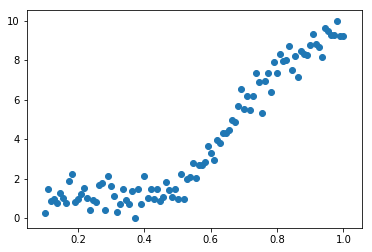

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
# normalization, keey algorithm numerically stable
data_x /= np.max(data_x)

plt.scatter(data_x, data_y)
plt.show()

我们可以通过给 x 增加一列 `ones` 来简化线性回归的公式：$y = w^Tx$

In [2]:
print(f"data_x input shape: {data_x.shape}")
data_x = np.hstack((np.ones_like(data_x), data_x))
print(f"data_x output shape: {data_x.shape}")

data_x input shape: (100, 1)
data_x output shape: (100, 2)


划分训练集和测试集

In [3]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

print(f"train_x output shape: {train_x.shape}")
print(f"test_x output shape: {test_x.shape}")

train_x output shape: (80, 2)
test_x output shape: (20, 2)


定义求梯度和误差的函数

In [4]:
def cal_gradient(w, x, y):
    # w.shape = (2, 1)
    # x.shape = (100, 2)
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1 / len(x)) * np.sum(np.power(error, 2))
    # 由于已经把 b 合并进了 w，我们只需要求 w 的偏导，见前面的偏导公式
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

执行训练迭代

In [7]:
w = np.random.randn(2)
learning_rate = 0.5
tolerance = 1e-5

iterations = 1
while True:
    gradient, error = cal_gradient(w, train_x, train_y)
    new_w = w - learning_rate * gradient
    
    # 停止条件
    if np.sum(abs(new_w - w)) < tolerance:
        print("Converged.")
        break
    
    if iterations > 1000:
        print("Something wrong")
        break
    
    if iterations % 100 == 0:
        print(f"Iteration: {iterations} - Error: {error} gradient: {gradient}")
    
    iterations += 1
    w = new_w

print("w =",w)
print("Test Cost =", cal_gradient(w, test_x, test_y)[1])

Iteration: 100 - Error: 1.4559718371232415 gradient: [ 0.01729488 -0.02917175]
Iteration: 200 - Error: 1.4342725645368086 gradient: [ 0.00119428 -0.00201443]
Iteration: 300 - Error: 1.434169092535746 gradient: [ 8.24698689e-05 -1.39104187e-04]
Converged.
w = [-2.24278854 11.16384995]
Test Cost = 1.3680160616892794


绘制训好的模型，即最终拟合的直线

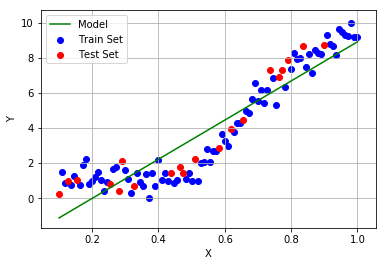

In [8]:
plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

J_vals.shape: (300, 300)


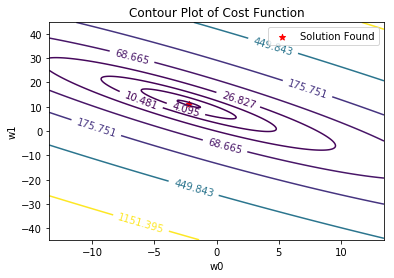

In [17]:
w1 = np.linspace(-w[1]*4, w[1]*4, 300)
w0 = np.linspace(-w[0]*6, w[0]*6, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))
print(f"J_vals.shape: {J_vals.shape}")

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = cal_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()

## 参考
- https://www.cs.toronto.edu/~frossard/post/linear_regression/